# VLE calculation for fluid mixtures with PC-SAFT
In this notebook, VLE calculations for fluid mixtures with ```saftgammamie``` EoS are illustrated.

First, all the needed modules are imported.

- numpy: numerical interface and work with arrays
- matplotlib: to plot results
- sgtpy: package with SAFT-$\gamma$-Mie EoS and phase equilibria functions.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from epcsaftpy import component, mixture, pcsaft

Now, pure components are configured and created with the ```component``` function. Then, a mixture is created with them using the ```mixture``` function or by adding (`+`) pure components. The interaction parameters are set up with the ```mixture.saftgammamie``` method. Finally, the ```eos``` object is created with the ```saftgammamie``` function.

The ```eos``` object includes all the necessary methods to compute phase equilibria and interfacial properties using SAFT-$\gamma$-Mie EoS.

For this notebook, all calculations are exemplified for a mixture of ethanol and water.

In [51]:
benzene = component('benzene', pure_path = 'parameters/gross2001.json')

twopropanol = component('2propanol', pure_path = 'parameters/solvents.json')
propanol = component('1propanol', pure_path = 'parameters/solvents.json')

mix = benzene + twopropanol
eos = pcsaft(mix)
mix.printParameters()
mix.set_kijsaft(0, 1, kij0=0.021)
mix2 = benzene + propanol
eos2 = pcsaft(mix2)
mix2.set_kijsaft(0, 1, kij0=0.02)


component,Mw,$ms$,$\sigma$,$\epsilon / k_B $,"[B, P, N]",$\epsilon _{AB} / k_B$,$k_{AB}$,reference
benzene,78.114,2.4653,3.6478,287.35,"[0, 0, 0]",0.0,0.000000,gross2001.json
2propanol,60.096,3.0929,3.2085,208.42,"[0, 1, 1]",2253.9,0.024675,solvents.json


In [52]:
from sgtpy.equilibrium import bubblePy

T = 313.15 # K
n = 100  # number of points in the diagram
x1 = np.linspace(0, 1, n)
X = np.array([x1, 1-x1])

# creating arrays to store the results
P1 = np.zeros(n)
P2 = np.zeros(n)
Y1 = np.zeros_like(X)
Y2 = np.zeros_like(X)

vx1 = np.zeros(n)
vy1 = np.zeros(n)
vx2 = np.zeros(n)
vy2 = np.zeros(n)

# computing first point - pure fluid 2
i = 0 
P0 = 4e4
sol1 = bubblePy(X[:, i], P0, X[:, i], T, eos, full_output=True)
Y1[:,i], P1[i] = sol1.Y, sol1.P
vx1[i], vy1[i] = sol1.v1, sol1.v2
Xassl1, Xassv1 = sol1.Xassl, sol1.Xassv


i = 0 
P0 = 4e4
sol2 = bubblePy(X[:, i], P0, X[:, i], T, eos2, full_output=True)
Y2[:,i], P2[i] = sol2.Y, sol2.P
vx2[i], vy2[i] = sol2.v1, sol2.v2
Xassl2, Xassv2 = sol2.Xassl, sol2.Xassv


In [53]:
# computing the rest of the diagram using the already computed values as initial guesses
for i in range(1, n):
    sol1 = bubblePy(Y1[:,i-1], P1[i-1], X[:, i], T, eos, v0=[vx1[i-1], vy1[i-1]], Xass0=[Xassl1, Xassv1],
                   full_output=True)
    Y1[:,i], P1[i] = sol1.Y, sol1.P
    vx1[i], vy1[i] = sol1.v1, sol1.v2
    Xassl1, Xassv1 = sol1.Xassl, sol1.Xassv

for i in range(1, n):
    sol2 = bubblePy(Y2[:,i-1], P2[i-1], X[:, i], T, eos2, v0=[vx2[i-1], vy2[i-1]], Xass0=[Xassl2, Xassv2],
                   full_output=True)
    Y2[:,i], P2[i] = sol2.Y, sol2.P
    vx2[i], vy2[i] = sol2.v1, sol2.v2
    Xassl2, Xassv2 = sol2.Xassl, sol2.Xassv

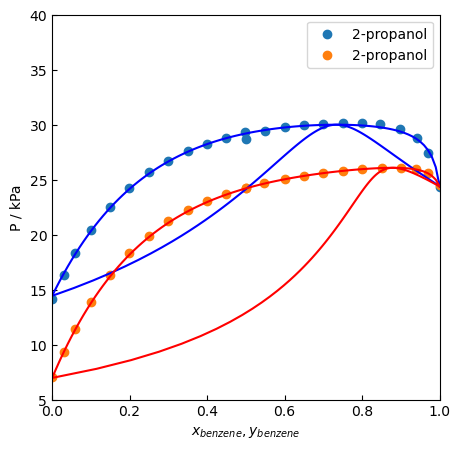

In [62]:
# Rhodes, J. M.; Griffin, T. A.; Lazzaroni, M. J.; Bhetha-nabotla, V. R.; Campbell, S. W. Total pressure measurements forbenzene with 1-propanol, 2-propanol, 1-pentanol, 3-pentanol, and2-methyl-2-butanol at 313.15 K. Fluid Phase Equilib. 2001, 179,217.
x1_exp = [0.0000, 0.0293, 0.0602, 0.1000, 0.1495, 0.1995, 0.2494, 0.2993, 0.3496, 0.3998, 0.4498, 0.4997, 0.4977, 0.5496, 0.5998, 0.6499, 0.6984, 0.7501, 0.8002, 0.8463, 0.8982, 0.9403, 0.9704, 1.0000],
p_exp = [14.161, 16.356, 18.292, 20.400, 22.549, 24.262, 25.665, 26.722, 27.555, 28.230, 28.768, 28.712, 29.338, 29.374, 29.794, 29.946, 30.031, 30.175, 30.172, 30.020, 29.587, 28.799, 27.455, 24.341]
x1_exp2 = [0.0000, 0.0295, 0.0593, 0.0993, 0.1492, 0.1992, 0.2491, 0.2993, 0.3494, 0.3995, 0.4496, 0.4997, 0.4996, 0.5469, 0.5997, 0.6495, 0.6995, 0.7498, 0.8001, 0.8500, 0.8994, 0.9402, 0.9705, 1.0000]
p_exp2 = [7.047, 9.358, 11.418, 13.828, 16.300, 18.308, 19.913, 21.206, 22.214, 23.030, 23.686, 24.219, 24.273, 24.697, 25.049, 25.334, 25.583, 25.778, 25.942, 26.043, 26.069, 25.931, 25.554, 24.541]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(X[0], P1/1e3, color='b')
ax.plot(Y1[0], P1/1e3, color='b')
ax.plot(X[0], P2/1e3, color='r')
ax.plot(Y2[0], P2/1e3, color='r')
ax.scatter(x1_exp, p_exp, label='2-propanol')
ax.scatter(x1_exp2, p_exp2, label='2-propanol')
ax.set_xlabel('$x_{benzene}, y_{benzene}$ ')
ax.set_ylabel('P / kPa')
ax.set_xlim([0, 1])
ax.set_ylim([5, 40])
ax.tick_params(direction='in')
ax.legend()
# fig.savefig('vle-binary.pdf')

In [55]:
propanol = component('1propanol', pure_path = 'parameters/solvents.json')
ethylbenzene = component('ethylbenzene', pure_path = 'parameters/gross2001.json')


mix3 = propanol + ethylbenzene
eos3 = pcsaft(mix3)
mix3.printParameters()
mix3.set_kijsaft(0, 1, kij0=0.023)

component,Mw,$ms$,$\sigma$,$\epsilon / k_B $,"[B, P, N]",$\epsilon _{AB} / k_B$,$k_{AB}$,reference
1propanol,60.096,2.9997,3.2522,233.40,"[0, 1, 1]",2276.8,0.015268,solvents.json
ethylbenzene,106.167,3.0799,3.7974,287.35,"[0, 0, 0]",0.0,0.000000,gross2001.json


In [56]:
from sgtpy.equilibrium import bubbleTy

P3 = 4e4 # Pa
n = 100  # number of points in the diagram
x1 = np.linspace(0, 1, n)
X = np.array([x1, 1-x1])

# creating arrays to store the results
T3 = np.zeros(n)
T4 = np.zeros(n)
Y3 = np.zeros_like(X)
Y4 = np.zeros_like(X)


vx3 = np.zeros(n)
vy3 = np.zeros(n)
vx4 = np.zeros(n)
vy4 = np.zeros(n)


# computing first point - pure fluid 2
i = 0 
T0 = 373
sol3 = bubbleTy(X[:, i], T0, X[:, i], P3, eos3, full_output=True)
Y3[:,i], T3[i] = sol3.Y, sol3.T
vx3[i], vy3[i] = sol3.v1, sol3.v2
Xassl3, Xassv3 = sol3.Xassl, sol3.Xassv

i = 0 
T0 = 403
P4 = 1.013e5 
sol4 = bubbleTy(X[:, i], T0, X[:, i], P4, eos3, full_output=True)
Y4[:,i], T4[i] = sol4.Y, sol4.T
vx4[i], vy4[i] = sol4.v1, sol4.v2
Xassl4, Xassv4 = sol4.Xassl, sol4.Xassv


In [57]:
# computing the rest of the diagram using the already computed values as initial guesses
for i in range(1, n):
    sol3 = bubbleTy(Y3[:,i-1], T3[i-1], X[:, i], P3, eos3, v0=[vx3[i-1], vy3[i-1]], Xass0=[Xassl3, Xassv3],
                   full_output=True)
    Y3[:,i], T3[i] = sol3.Y, sol3.T
    vx3[i], vy3[i] = sol3.v1, sol3.v2
    Xassl3, Xassv3 = sol3.Xassl, sol3.Xassv

for i in range(1, n):
    sol4 = bubbleTy(Y4[:,i-1], T4[i-1], X[:, i], P4, eos3, v0=[vx4[i-1], vy4[i-1]], Xass0=[Xassl4, Xassv4],
                   full_output=True)
    Y4[:,i], T4[i] = sol4.Y, sol4.T
    vx4[i], vy4[i] = sol4.v1, sol4.v2
    Xassl4, Xassv4 = sol4.Xassl, sol4.Xassv

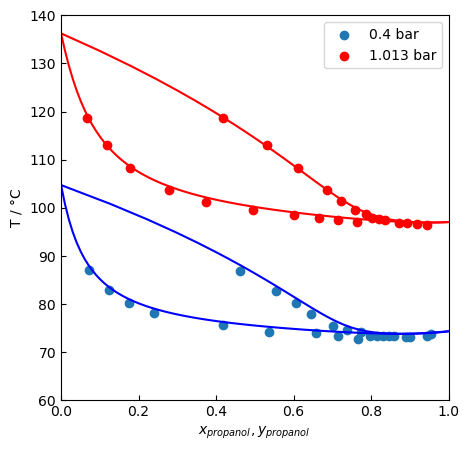

In [58]:
# Ellis, S. R. M.; Froome, B. A. Chem. Ind. 1954, 237
x1_exp = [0.07283950617283952, 0.12345679012345678, 0.1753086419753086, 0.23950617283950615, 0.41851851851851846, 0.537037037037037, 0.6580246913580245, 0.7135802469135801, 0.7666666666666666, 0.46296296296296285, 0.5543209876543209, 0.6061728395061727, 0.6444444444444444, 0.7012345679012346, 0.7382716049382716, 0.7753086419753086, 0.7962962962962963, 0.8148148148148147, 0.8296296296296295, 0.8469135802469134, 0.8580246913580245, 0.8901234567901233, 0.9012345679012346, 0.9456790123456789, 0.9555555555555555]
t1_exp = [87.04402515723271, 83.01886792452831, 80.25157232704403, 78.11320754716982, 75.59748427672956, 74.21383647798743, 73.9622641509434, 73.33333333333334, 72.83018867924528, 86.79245283018868, 82.76729559748428, 80.25157232704403, 77.9874213836478, 75.34591194968554, 74.59119496855347, 74.0880503144654, 73.33333333333334, 73.45911949685535, 73.45911949685535, 73.33333333333334, 73.45911949685535, 73.20754716981132, 73.20754716981132, 73.45911949685535, 73.83647798742139]
x1_exp2 = [0.06790123456790126, 0.11975308641975307, 0.1790123456790123, 0.2790123456790123, 0.37407407407407406, 0.4962962962962962, 0.6012345679012345, 0.6654320987654321, 0.7148148148148148, 0.7629629629629631, 0.8716049382716047, 0.41851851851851846, 0.5308641975308641, 0.6123456790123456, 0.6864197530864198, 0.7222222222222223, 0.7592592592592591, 0.7864197530864196, 0.8037037037037036, 0.8209876543209875, 0.8370370370370368, 0.8925925925925924, 0.919753086419753, 0.9456790123456789]
t2_exp = [118.74213836477988, 113.0817610062893, 108.17610062893081, 103.64779874213836, 101.25786163522012, 99.62264150943396, 98.49056603773585, 97.86163522012578, 97.48427672955975, 97.1069182389937, 96.85534591194968, 118.61635220125785, 113.0817610062893, 108.17610062893081, 103.77358490566039, 101.50943396226415, 99.62264150943396, 98.61635220125785, 97.86163522012578, 97.73584905660377, 97.35849056603774, 96.85534591194968, 96.72955974842768, 96.47798742138365]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(X[0], T3-273.15, color='b')
ax.plot(Y3[0], T3-273.15, color='b')
ax.plot(X[0], T4-273.15, color='r')
ax.plot(Y4[0], T4-273.15, color='r')
ax.scatter(x1_exp, t1_exp, label='0.4 bar')
ax.scatter(x1_exp2, t2_exp, color='r', label='1.013 bar')
ax.set_xlabel('$x_{propanol}, y_{propanol}$ ')
ax.set_ylabel('T / °C')
ax.set_xlim([0, 1])
ax.set_ylim([60, 140])
ax.tick_params(direction='in')
ax.legend()